In [2]:
model_path = '../output/ablation-mnist-models/relog-elliptical-maxout_4-sigmoid_out-max_fit_l1_1-overlay.pkl'

In [3]:
import sys
sys.path.append('..')

In [21]:
%matplotlib inline
from scipy.special import softmax
import seaborn as sns
from matplotlib import pyplot as plt
import torch
import torchvision
import numpy as np

In [22]:
model = torch.load(model_path, map_location=torch.device('cpu'))

In [23]:
dataset = torchvision.datasets.MNIST(
            root='../mnist',
            train=True,
            transform=torchvision.transforms.ToTensor(), 
            download=False,
        )
loader = torch.utils.data.DataLoader(dataset, batch_size=100, shuffle=False)

In [24]:
x, y = next(iter(loader))

In [25]:
def compute_max_probs(x):
    preds, _ = model(x)
    preds_softmax = softmax(preds.detach().numpy(), axis=1)
    max_probs = np.max(preds_softmax, axis=1)
    return max_probs

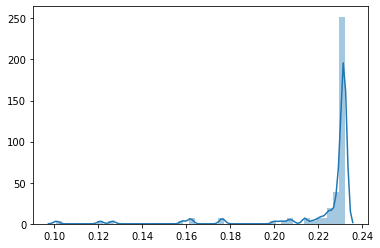

In [26]:
max_probs = compute_max_probs(x)
sns.distplot(max_probs)

In [27]:
max_probs.mean()

0.22221161

In [28]:
max_probs.std()

0.023945235

# How does it fare on training set?

In [15]:
train_dataset = torchvision.datasets.MNIST(
            root='../mnist',
            train=True,
            transform=torchvision.transforms.ToTensor(), 
            download=False,
        )
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=False)

In [16]:
train_x, train_y = next(iter(train_loader))

In [29]:
max_probs = compute_max_probs(train_x)

In [30]:
max_probs.mean()

0.22221161

In [31]:
max_probs.std()

0.023945235